In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model


In [3]:
x_train = np.load('./data/x_train.npy')
x_test = np.load('./data/x_test.npy')
y_train = np.load('./data/y_train.npy')
y_test = np.load('./data/y_test.npy')

In [5]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, x_train.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [6]:
history=lstm.fit(x_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
237/237 [==============================] - 3s 7ms/step - loss: 50163.7852
Epoch 2/100
237/237 [==============================] - 2s 6ms/step - loss: 511.2219
Epoch 3/100
237/237 [==============================] - 1s 6ms/step - loss: 2.0063
Epoch 4/100
237/237 [==============================] - 1s 6ms/step - loss: 18.9433
Epoch 5/100
237/237 [==============================] - 1s 6ms/step - loss: 1.2202
Epoch 6/100
237/237 [==============================] - 2s 6ms/step - loss: 1.0896
Epoch 7/100
237/237 [==============================] - 2s 6ms/step - loss: 96.3056
Epoch 8/100
237/237 [==============================] - 2s 6ms/step - loss: 0.7980
Epoch 9/100
237/237 [==============================] - 2s 6ms/step - loss: 0.7351
Epoch 10/100
237/237 [==============================] - 2s 6ms/step - loss: 0.6845
Epoch 11/100
237/237 [==============================] - 2s 6ms/step - loss: 0.6448
Epoch 12/100
237/237 [==============================] - 2s 6ms/step - loss: 0.6148
Epoch

In [7]:
y_pred = lstm.predict(x_test)


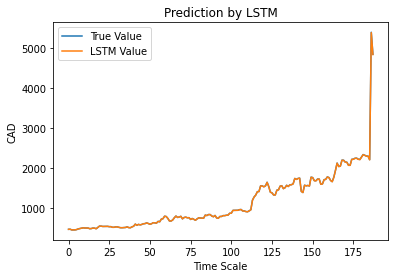

In [8]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('CAD')
plt.legend()
plt.show()